In [1]:
# Install packages
!pip install ultralytics > /dev/null 2>&1
!pip install roboflow > /dev/null 2>&1

----------Started: Running ASAS Tracking ----------

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs
Results saved to runs/detect/track4
----------Completed: Running ASAS Tracking ----------
avi_path: runs/detect/track/test.avi
mp4_output_path: /content/tracked_output_videos/test.mp4

----------VIDEO ANALYSIS-------------

1. Unique basketball ID: 81
2. Unique player IDs (filtered): [1, 2, 3, 4, 5, 7, 8, 10, 11, 14]
3. Number of unique players (filtered): 10
4. Unique referee IDs (filtered): [8, 9, 48]

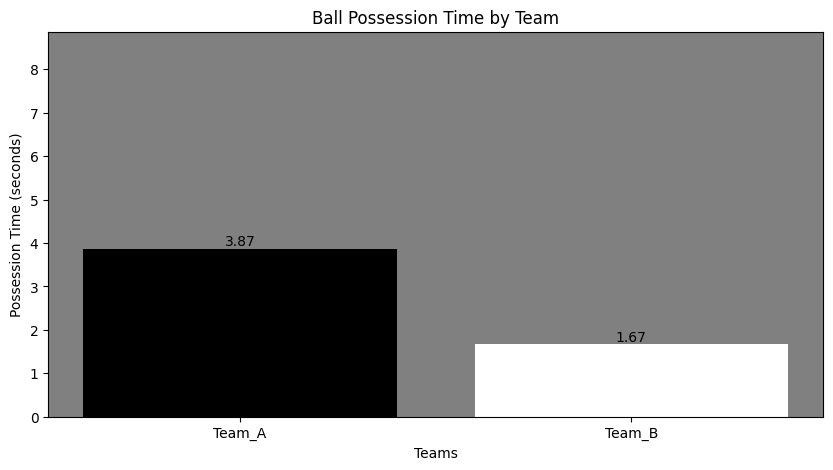

avi_path: runs/detect/track/test.avi
mp4_output_path: /content/tracked_output_videos/test.mp4
orig_h_w_of_image ->  (720, 1280)
self.bp_frame_color-> {0: 'white', 1: 'white', 3: 'white', 4: 'white', 5: 'white', 6: 'white', 7: 'white', 8: 'white', 9: 'white', 10: 'white', 12: 'white', 13: 'white', 14: 'white', 15: 'white', 16: 'white', 17: 'white', 19: 'white', 23: 'white', 25: 'white', 27: 'white', 31: 'white', 33: 'white', 41: 'white', 42: 'white', 43: 'white', 44: 'white', 45: 'white', 46: 'white', 47: 'white', 50: 'white', 51: 'white', 52: 'white', 53: 'white', 57: 'white', 83: 'white', 85: 'white', 87: 'white', 89: 'white', 91: 'white', 92: 'white', 93: 'white', 94: 'white', 95: 'white', 101: 'white', 107: 'purple', 109: 'purple', 115: 'purple', 117: 'red', 118: 'white', 119: 'white', 123: 'white', 124: 'red', 125: 'red', 126: 'red', 127: 'red', 128: 'red', 129: 'red', 130: 'red', 131: 'red', 132: 'red', 133: 'red', 134: 'red', 135: 'red', 136: 'red', 137: 'red', 138: 'purple', 139

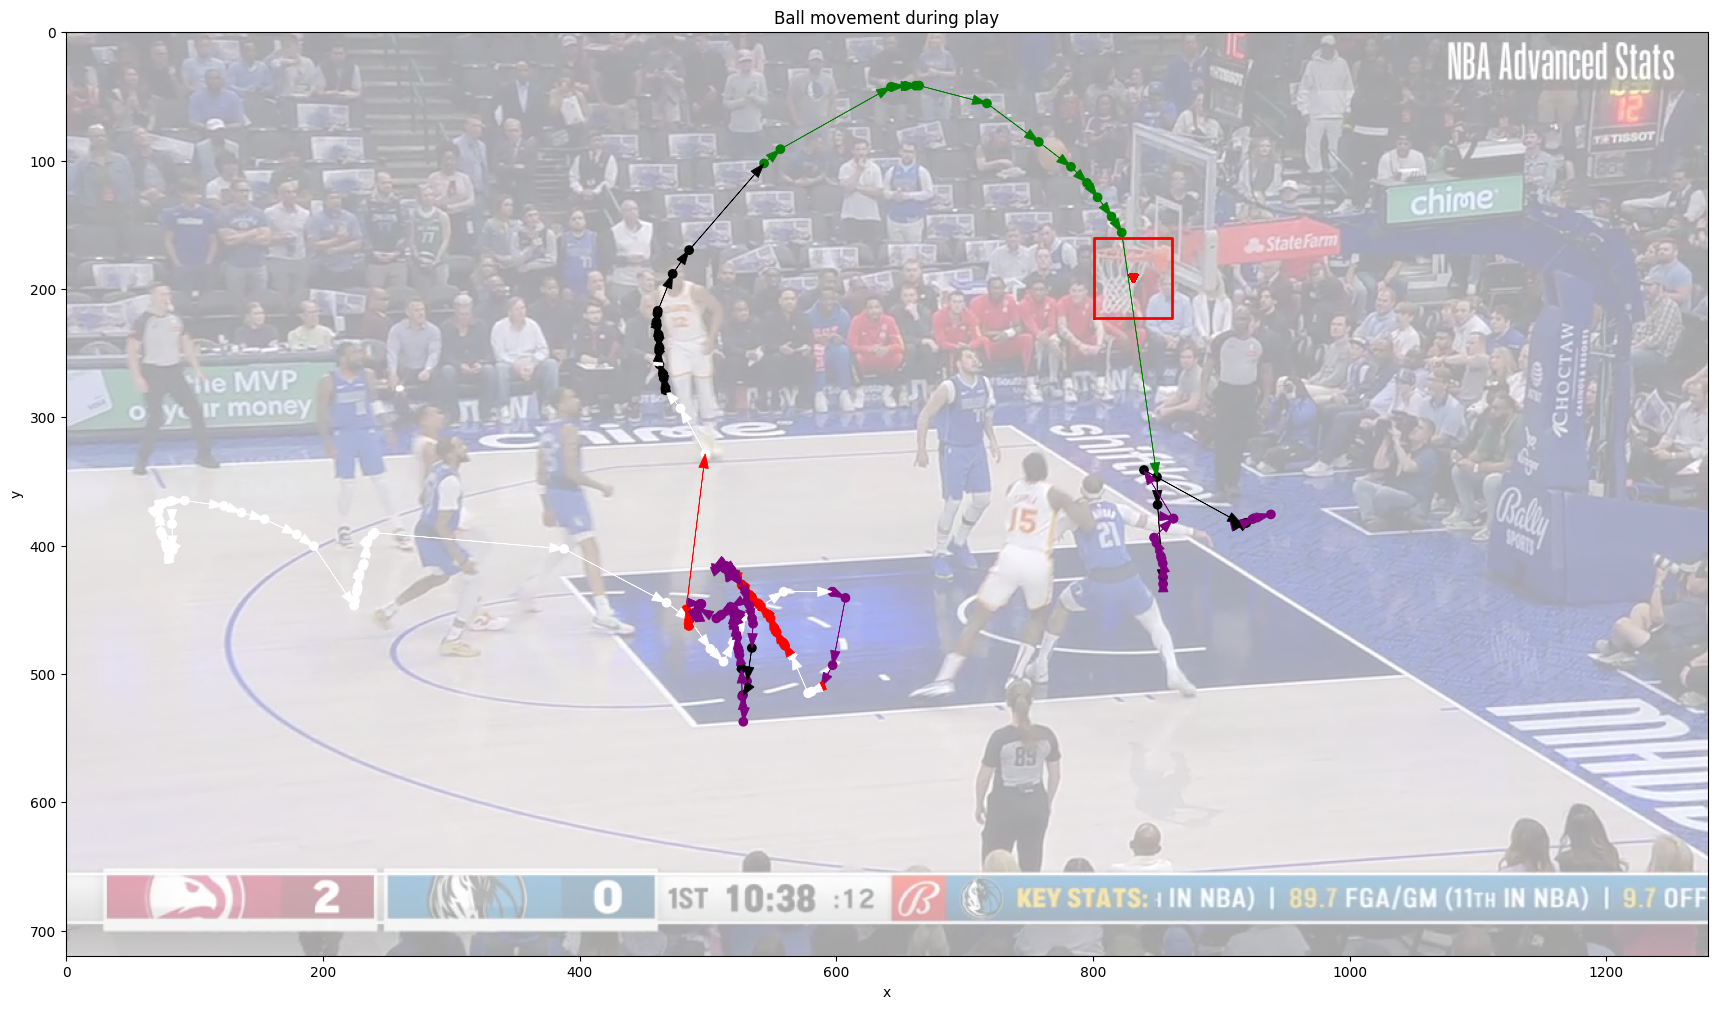

In [1]:
from models.asas import ASAS

# asas_model = ASAS('/content/drive/MyDrive/model/8x_07_best.pt')
asas_model = ASAS('./weights/yolox-10-games.pt', team_a_color='blue', team_b_color='white', device='mps')
video_url = 'https://videos.nba.com/nba/pbp/media/2024/04/04/0022301124/16/56783a77-7351-383d-0f4d-d19cf1cfc68b_1280x720.mp4'
local_save_path = './input_videos/test.mp4'

# Run each analytics type

# 1. Ball Possession Analytics
asas_analytics = asas_model.run_analytics(video_url, local_save_path, analysis_type='BALL_POSSESSION')
asas_analytics.ball_possession_result.plot_ball_possession_time()

# 2. Ball Trajectory Analytics
asas_analytics = asas_model.run_analytics(video_url, local_save_path, analysis_type='BALL_TRAJECTORY')
asas_analytics.ball_trajectory_result.plot_ball_and_net_wrto_net_position()

In [62]:
#!rm -r '/content/dataset'
!rm -r '/content/runs'
!rm -r '/content/input_videos'
!rm -r '/content/tracked_output_videos'

In [2]:
!pip freeze | grep 'ultralytics'

ultralytics==8.2.6
